### Austin AirBnB Listings (2023)

The goal of this project is to perform EDA after cleaning the dataset. 

In [3]:
#Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import zipcodes 
import folium

In [4]:
# Reading the data

df = pd.read_csv('listings.csv')

In [5]:
# Viewing a sample of the data

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,NaN,78702,30.26057,-97.73441,Entire home/apt,126,2,657,2023-08-27,3.72,1,306,42,NaN
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,NaN,78729,30.45697,-97.78422,Private room,45,1,290,2023-08-04,1.77,1,0,21,NaN
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,NaN,78704,30.24885,-97.73587,Entire home/apt,57,30,122,2022-10-17,0.73,1,0,3,NaN
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,NaN,78704,30.26034,-97.76487,Entire home/apt,159,3,305,2023-09-04,2.09,1,156,17,NaN
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,NaN,78741,30.23466,-97.73682,Entire home/apt,48,4,51,2023-05-16,0.31,1,98,3,NaN


In [6]:
# Overview of Data

df.describe()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.486100e+04,1.486100e+04,0.0,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,14861.000000,11758.000000,14861.000000,14861.000000,14861.000000,0.0
mean,3.418962e+17,1.455670e+08,NaN,78724.538254,30.281061,-97.749786,269.298769,7.629365,37.843348,1.537180,11.047641,152.092591,10.367674,NaN
std,3.952050e+17,1.608509e+08,NaN,20.681156,0.065000,0.062634,549.376464,28.289063,79.894590,1.711574,24.472357,136.610382,17.111299,NaN
min,5.456000e+03,2.300000e+01,NaN,78701.000000,30.078440,-98.053350,1.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,2.401701e+07,1.613528e+07,NaN,78704.000000,30.241870,-97.768528,95.000000,1.000000,1.000000,0.260000,1.000000,1.000000,0.000000,NaN
50%,5.176864e+07,7.039337e+07,NaN,78723.000000,30.269160,-97.740600,150.000000,2.000000,8.000000,0.990000,2.000000,127.000000,2.000000,NaN
75%,7.543632e+17,2.537258e+08,NaN,78745.000000,30.309070,-97.716692,266.000000,3.000000,38.000000,2.260000,6.000000,302.000000,14.000000,NaN
max,9.770652e+17,5.363086e+08,NaN,78759.000000,30.518350,-97.559300,19286.000000,1124.000000,1141.000000,26.250000,136.000000,365.000000,258.000000,NaN


In [7]:
# Distribution of null values

df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               14861
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3103
reviews_per_month                  3103
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14861
dtype: int64

In [8]:
# On first glance of the null value distribution, we can confirm that the 'neighbourhood_group' and 'license' columns
# are not very useful

# The 'last_review' and 'reviews_per_month' have a significant no. of null values.

# Dropping the columns

df = df.drop(columns=['neighbourhood_group', 'license', 'last_review', 'reviews_per_month'])
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,126,2,657,1,306,42
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.45697,-97.78422,Private room,45,1,290,1,0,21
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,57,30,122,1,0,3
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.26034,-97.76487,Entire home/apt,159,3,305,1,156,17
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,48,4,51,1,98,3


In [9]:
# Rechecking the distribution of null values

df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         2
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [10]:
# Checking for duplicates

df.duplicated().sum()

0

In [11]:
# Convert 'name' string into city
def convert_to_city(name):
    split = name.split(' ')
    Index = None
    for i in range(len(split)):
        if split[i] == 'in':
            Index = i+1
    return split[Index]
    
# Extracting all the listings from Austin only
df['city'] = df['name'].apply(convert_to_city)
df_austin = df[df['city'] == 'Austin']
df_austin = df_austin.reset_index(drop=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,5456,Guesthouse in Austin · ★4.84 · 1 bedroom · 2 b...,8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,126,2,657,1,306,42,Austin
1,5769,Home in Austin · ★4.90 · 1 bedroom · 1 bed · 1...,8186,Elizabeth,78729,30.45697,-97.78422,Private room,45,1,290,1,0,21,Austin
2,6413,Guesthouse in Austin · ★4.97 · Studio · 1 bed ...,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,57,30,122,1,0,3,Austin
3,6448,Guesthouse in Austin · ★4.97 · 1 bedroom · 2 b...,14156,Amy,78704,30.26034,-97.76487,Entire home/apt,159,3,305,1,156,17,Austin
4,8502,Guest suite in Austin · ★4.56 · 1 bedroom · 1 ...,25298,Karen,78741,30.23466,-97.73682,Entire home/apt,48,4,51,1,98,3,Austin


### Descriptive Statistics:

In [12]:
# Range of Listing Prices

max_price = df_austin['price'].max()
min_price = df_austin['price'].min()
print(f'Range of Listing Prices: {max_price-min_price}')

Range of Listing Prices: 19285


In [13]:
# Average Price of Listings

avgPrice = df_austin['price'].mean()
print(f'Average of Listing Prices: {avgPrice}')

Average of Listing Prices: 267.8068654882959


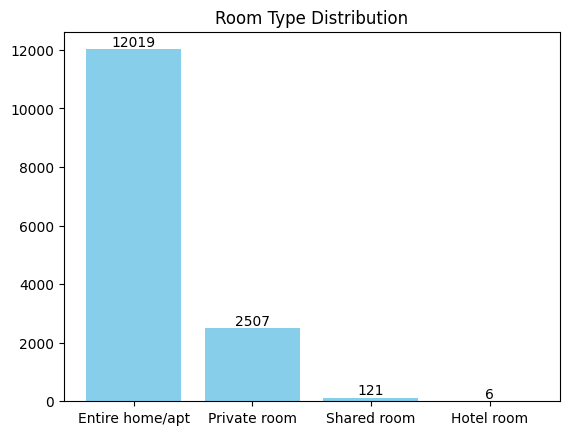

In [14]:
# Distribution of Room Types


# Function for creating a distribution of values 

def roomType_distribution(series):
    roomType = dict()
    for i in series:
        if i not in roomType:
            roomType[i] = 1
        else:
            roomType[i] += 1

    return roomType

roomType = roomType_distribution(df_austin['room_type'])

# Bar graph for plotting Room Type Distribution 

labels = roomType.keys()
values = [x[1] for x in roomType.items()]
plt.bar(labels,values,color='skyblue')
plt.title('Room Type Distribution')


for i,v in enumerate(values):
    plt.text(i,v,str(v),ha='center', va='bottom')

In [15]:
# No. of Unique Neighbourhoods represented 

uniqueNeighbourhoods = df_austin['neighbourhood'].nunique()
print(f'No. of Unique Neighbourhoods: {uniqueNeighbourhoods}')

No. of Unique Neighbourhoods: 44


Text(0.5, 1.0, 'Minimum Nights Distribution')

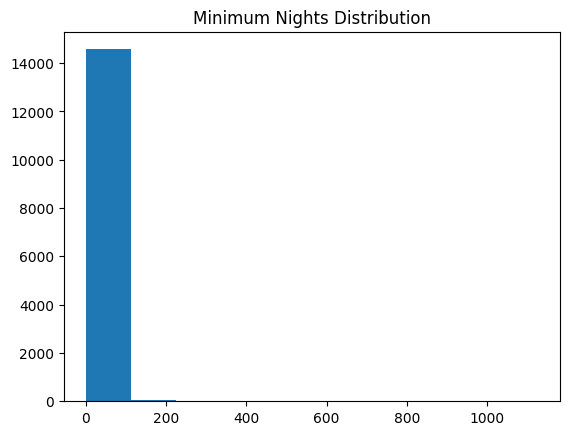

In [16]:
# Distribution of minimum number of nights for booking requirements

plt.hist(df_austin['minimum_nights'], bins=10, )
plt.title('Minimum Nights Distribution')

### Location Analysis:

In [17]:
# Adding a 'county' column based on the 'neighbourhood' codes provided

df_austin['county'] = [zipcodes.matching(str(x))[0]['county'] for x in df_austin['neighbourhood']] 
df_austin['county'].head()

0        Travis County
1    Williamson County
2        Travis County
3        Travis County
4        Travis County
Name: county, dtype: object

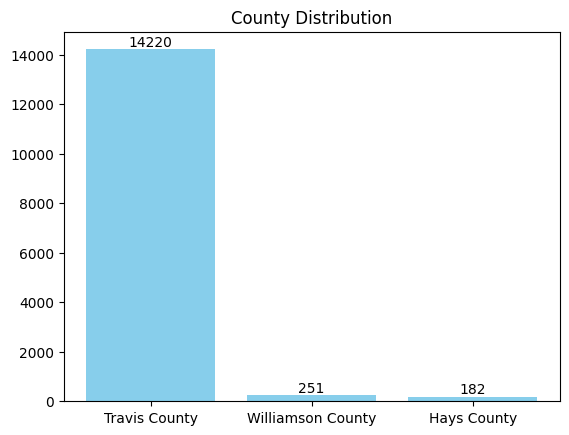

In [18]:
#Distribution of Counties 

# Function for distribution of country

def county_distribution(series):
    county = dict()
    for i in series:
        if i not in county:
            county[i] = 1
        else:
            county[i] += 1

    return county

counties = county_distribution(df_austin['county'])

labels = counties.keys()
values = [x[1] for x in counties.items()]
plt.bar(labels,values,color='skyblue')
plt.title('County Distribution')


for i,v in enumerate(values):
    plt.text(i,v,str(v),ha='center', va='bottom')

In [19]:
# Average Listing Price of Travis County

# List of Counties
austinCounties = list(counties.keys())

# Average Listing Prices of Counties
avg_prices = [df_austin.loc[df_austin.county == i,['price']].mean() for i in austinCounties]


for i,j in zip(austinCounties, avg_prices):
    print(f'{i} : \b{j}\b\n')

Travis County :price    268.286287
dtype: float6

Williamson County :price    144.0
dtype: float6

Hays County :price    401.093407
dtype: float6



In [25]:
# Plotting the listings according to thier co-ordinates

latitudes = df_austin['latitude']
longitudes = df_austin['longitude']

austin_map = folium.Map(location=(30.2672, -97.7431), zoom_start=10)

for lat, lon in zip(latitudes, longitudes):
    folium.Marker([lat, lon]).add_to(austin_map)

austin_map.save('Listings Map.html')

austin_map

In [ ]:
kjdkdjfhdffsdfsdf